In [228]:
# muiltiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random
import packcircles as pc
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

# 读取数据

In [229]:
data = pd.read_csv('data_13_22.csv', sep=';')

In [230]:
data.head()
data[data['rank']==201].index
data = data.drop(data[data['rank']==201].index).reset_index(drop=True)
data.shape

,Movie,Distributor,Genre,Gross,Tickets Sold,rank,releaseYear
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013


Int64Index([200, 401, 602, 803, 1004, 1205, 1406, 1607, 1808, 2009], dtype='int64')

(2000, 7)

# 获取xy坐标

In [231]:
x = []
y = []
with open('song-coordinate.txt') as f: 
    line = f.readline()
    while line: 
        line = line[1:-2].split(',')
        x.append(float(line[0]))
        y.append(float(line[1]))
        line = f.readline()
coor = pd.DataFrame({'x': x, 'y': y}).iloc[:2000, :]
coor.shape

(2000, 2)

In [232]:
# coor_sorted = coor.sort_values(by=['x']).reset_index(drop=True)
# coor_sorted.head(20)

# 添加xy坐标

In [233]:
data.shape, coor.shape
data.tail()
coor.tail()

((2000, 7), (2000, 2))

,Movie,Distributor,Genre,Gross,Tickets Sold,rank,releaseYear
1995,Tyson's Run,Collide Distribution,Drama,391167,37432,196,2022
1996,The Inspection,A24,Drama,385627,36902,197,2022
1997,Alice,Roadside Attractions,Thriller/Suspense,373037,35697,198,2022
1998,Selena,Warner Bros.,Drama,360000,39258,199,2022
1999,Inu-Oh,GKIDS,Musical,351558,33641,200,2022


,x,y
1995,993.76,167.32
1996,1708.64,238.17
1997,419.48,258.65
1998,1772.06,333.59
1999,1548.91,254.69


In [234]:
data_crop = pd.concat([data, coor], axis=1)
data_crop.head()
data_crop.shape

,Movie,Distributor,Genre,Gross,Tickets Sold,rank,releaseYear,x,y
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013,887.85,169.88
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013,930.50,265.54
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013,784.02,145.53
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013,859.17,281.43
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013,815.22,302.71


(2000, 9)

# 更改column names

In [235]:
# data_crop.columns = ['rank', 'title', 'releaseYear', 'artist', 
#                      'listType', 'listHighestRank', 'Tickets Sold', 'x', 'y']
data_crop.columns = ['title', 'artist', 'listType', 'Gross', 
                     'Tickets_Sold', 'rank_each_year', 'releaseYear', 'x', 'y']

In [236]:
data_crop.head()

,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013,887.85,169.88
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013,930.50,265.54
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013,784.02,145.53
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013,859.17,281.43
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013,815.22,302.71


In [237]:
data_crop['rank'] = data_crop['Gross'].rank(ascending=False)
data_crop.iloc[195:205, :]

,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank
195,Hotel Transylvania,Sony Pictures,Adventure,2140687,263307,196,2013,750.72,397.97,1702.0
196,Austenland,Sony Pictures Cla...,Romantic Comedy,2137573,262924,197,2013,1833.99,167.10,1704.0
197,Blackfish,Magnolia Pictures,Documentary,2073582,255053,198,2013,1874.12,248.22,1708.0
198,The Iceman,Alchemy,Drama,1930282,237427,199,2013,1250.11,306.01,1717.0
199,Fill the Void,Sony Pictures Cla...,Drama,1774639,218282,200,2013,1348.39,212.61,1726.0
200,Guardians of the Galaxy,Walt Disney,Action,333055258,40765637,1,2014,1228.34,181.13,45.0
201,The Hunger Games: Mockingja...,Lionsgate,Thriller/Suspense,323734502,39624786,2,2014,1393.82,152.58,50.0
202,Captain America: The Winter...,Walt Disney,Action,259746958,31792773,3,2014,1557.28,329.19,58.0
203,The Lego Movie,Warner Bros.,Adventure,257784718,31552597,4,2014,1801.66,347.47,59.0
204,Transformers: Age of Extinc...,Paramount Pictures,Action,245439076,30041502,5,2014,811.69,112.85,61.0


In [238]:
data_crop['listHighestRank'] = data_crop['Gross'].apply(lambda x: np.log(x))

In [239]:
data_crop.head()
data_crop.tail()

,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank,listHighestRank
0,Iron Man 3,Walt Disney,Action,408992272,50306552,1,2013,887.85,169.88,23.0,19.829207
1,The Hunger Games: Catching ...,Lionsgate,Adventure,407139699,50078683,2,2013,930.50,265.54,25.0,19.824667
2,Despicable Me 2,Universal,Adventure,367956735,45259130,3,2013,784.02,145.53,33.0,19.723476
3,Frozen,Walt Disney,Musical,296691729,36493447,4,2013,859.17,281.43,52.0,19.508204
4,Man of Steel,Warner Bros.,Action,291045518,35798956,5,2013,815.22,302.71,53.0,19.488990


,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank,listHighestRank
1995,Tyson's Run,Collide Distribution,Drama,391167,37432,196,2022,993.76,167.32,1887.0,12.876890
1996,The Inspection,A24,Drama,385627,36902,197,2022,1708.64,238.17,1889.0,12.862626
1997,Alice,Roadside Attractions,Thriller/Suspense,373037,35697,198,2022,419.48,258.65,1892.0,12.829433
1998,Selena,Warner Bros.,Drama,360000,39258,199,2022,1772.06,333.59,1896.0,12.793859
1999,Inu-Oh,GKIDS,Musical,351558,33641,200,2022,1548.91,254.69,1900.0,12.770130


In [240]:
data_crop.to_csv('data_coordinates.csv')

In [241]:
# ?pd.DataFrame.rank

# 添加circles

In [336]:
def rank2radius(rk, blank_circle_radius=30):
    ''' rank => radius '''
    if rk >= 1 and rk <= 5:
        rd = 25
    elif rk >= 5 and rk <= 10:
        rd = 22
    elif rk >= 11 and rk <= 30:
        rd = 20
    elif rk >= 31 and rk <= 50:
        rd = 17
    elif rk >= 51 and rk <= 70:
        rd = 15
    elif rk >= 71 and rk <= 90:
        rd = 13
    elif rk >= 91 and rk <= 110:
        rd = 9
    elif rk >= 111 and rk <= 130:
        rd = 7
    elif rk >= 131 and rk <= 170:
        rd = 5
    elif rk >= 171 and rk <= 201:
        rd = 3
    else: # 年份坐标
        rd = blank_circle_radius
    return rd

In [337]:
data2013 = get_year_data(year=2013, 
                         num_each_year=50, 
                         blank_circle_radius=30, 
                         center_circle=[0, 0])
data2014 = get_year_data(year=2014, 
                         num_each_year=50, 
                         blank_circle_radius=30, 
                         center_circle=[0, 0])
data2013.head()
data2014.head()
data_tmp = pd.concat([data2013.iloc[1:, :], data2014.iloc[1:, :]], axis=0)
data_tmp.shape

,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.856825,11.971527,30
1,Turbo,20th Century Fox,Adventure,83028130.0,10212562.0,43.0,2013.0,16.143175,11.971527,17
2,Jackass Presents: Bad Grandpa,Paramount Pictures,Comedy,101625444.0,12500054.0,31.0,2013.0,3.845303,-19.726460,17
3,Broken City,20th Century Fox,Thriller/Suspense,19701164.0,2423267.0,113.0,2013.0,25.788296,-10.005089,7
4,2013 Oscar Shorts,Shorts International,Multiple Genres,2142342.0,263510.0,195.0,2013.0,30.969254,-1.451863,3


,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31.292379,7.060604,30
1,The Legend of Hercules,Lionsgate,Adventure,18848538.0,2307042.0,115.0,2014.0,5.707621,7.060604,7
2,The Purge: Anarchy,Universal,Thriller/Suspense,71562550.0,8759186.0,44.0,2014.0,9.275188,-16.672758,17
3,The Hunger Games: Catching ...,Lionsgate,Adventure,17528348.0,2145452.0,121.0,2014.0,19.557107,5.013232,7
4,Maleficent,Walt Disney,Adventure,241407328.0,29548020.0,6.0,2014.0,16.747946,33.876853,22


(100, 10)

In [338]:
data_2014.to_csv('data_tmp.csv', index=False)

In [342]:
data_2014.head()

# data_2014 = get_two_year([2021, 2022])
# data_2014.to_csv('data_tmp.csv', index=False)

,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank,listHighestRank
1,In the Heights,Warner Bros.,Musical,29975167.0,3268830.0,36.0,2021.0,1791.521261,248.825630,17,17.215880
2,World War Z,Paramount Pictures,Action,347000.0,37840.0,161.0,2021.0,1775.904240,233.330191,5,12.757080
3,Shang-Chi and the Legend of...,Walt Disney,Action,224543292.0,24486728.0,2.0,2021.0,1775.432465,203.333900,25,19.229579
4,Together,Bleecker Street,Comedy,214390.0,20614.0,186.0,2021.0,1783.272344,230.213936,3,12.275552
5,A Rescue of Little Eggs,Lionsgate,Comedy,927154.0,89149.0,126.0,2021.0,1798.235787,225.784034,7,13.739875


In [366]:
def get_year_data(year, num_each_year=50, blank_circle_radius=30, center_circle=[None, None]): 
    # get data of __ year
    data = data_crop[data_crop['releaseYear']==year].iloc[:, :7]
    # shuffle the data
    data_shuffled = data.sample(frac=1).reset_index(drop=True)
    # get radius according to the ranking in that year
    radius = list(data_shuffled['rank_each_year'].apply(lambda x: rank2radius(x, blank_circle_radius)))
    radius = [blank_circle_radius] + radius
    circles = pc.pack(radius)
    # generate coordinates
    coor_x, coor_y, r = [], [], []
    for (x,y,radius) in circles:
        coor_x.append(x)
        coor_y.append(y)
        r.append(radius)
    df_year_circle = pd.DataFrame(data = [[np.nan] * 7], columns=data_shuffled.columns)
    # concat coordinate to the dataframe
    data_shuffled_2 = pd.concat([df_year_circle, 
                                 data_shuffled.iloc[:num_each_year, :]], axis=0).reset_index(drop=True)
    data_shuffled_2['x'] = list(map(lambda x: x + center_circle[0], coor_x[:num_each_year+1]))
    data_shuffled_2['y'] = list(map(lambda x: x + center_circle[1], coor_y[:num_each_year+1]))
    data_shuffled_2['rank'] = r[:num_each_year+1]
    return data_shuffled_2


def get_two_year(year=[None, None], num_each_year=50, blank_circle_radius=10): 
    year_coordinates = {2014: [600, 240], 
                        2016: [885, 240], 
                        2018: [1170, 240], 
                        2020: [1455, 240], 
                        2022: [1740, 240]}
    
    data_1 = get_year_data(year[0], 
                           num_each_year=num_each_year, 
                           blank_circle_radius=blank_circle_radius, 
                           center_circle=[0, 0])
    data_2 = get_year_data(year[1], 
                           num_each_year=num_each_year, 
                           blank_circle_radius=blank_circle_radius, 
                           center_circle=[0, 0])
    print(data_1.head())
    data_concat = pd.concat([data_1, data_2.iloc[1:, :]], axis=0)
    data_concat['listHighestRank'] = data_concat['Gross'].apply(lambda x: np.log(x))
    radius = list(data_concat['rank_each_year'].apply(lambda x: rank2radius(x, blank_circle_radius)))
    circles = pc.pack(radius)
    # generate coordinates
    coor_x, coor_y, r = [], [], []
    for (x,y,radius_) in circles:
        coor_x.append(x)
        coor_y.append(y)
        r.append(radius_)    
    
    data_concat['x'] = list(map(lambda x: x + year_coordinates[sum(year) // 2 + 1][0], 
                                coor_x[:num_each_year * 2 + 1]))
    data_concat['y'] = list(map(lambda x: x + year_coordinates[sum(year) // 2 + 1][1], 
                                coor_y[:num_each_year * 2 + 1]))
    data_concat['rank'] = r[:num_each_year * 2 + 1]
    
    return data_concat.iloc[1:, :]
    
    
def get_data_of_all_year(year_list=[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], 
                         columns=['title', 'artist', 'listType', 'Gross', 'Tickets_Sold',
                                  'rank_each_year', 'releaseYear', 'x', 'y', 'rank']): 
    DATA = pd.DataFrame(columns=columns)
    year_coordinates = {2013: [470, 240], 
                        2014: [615, 240], 
                        2015: [760, 240], 
                        2016: [905, 240], 
                        2017: [1050, 240], 
                        2018: [1195, 240], 
                        2019: [1340, 240], 
                        2020: [1485, 240], 
                        2021: [1630, 240], 
                        2022: [2000, 240]}
    for year in year_list: 
        data_tmp = get_year_data(year, center_circle=year_coordinates[year]).iloc[1:, :]
        DATA = pd.concat([DATA, data_tmp], axis=0)
    DATA['listHighestRank'] = DATA['Gross'].apply(lambda x: np.log(x))
    return DATA

DATA = get_data_of_all_year()


def get_data_of_all_year_2(year_list=[2014, 2016, 2018, 2020, 2022], 
                         columns=['title', 'artist', 'listType', 'Gross', 'Tickets_Sold',
                                  'rank_each_year', 'releaseYear', 'x', 'y', 'rank'], 
                          num_each_year=50): 
    DATA = pd.DataFrame(columns=columns)
    for year in year_list: 
        data_tmp = get_two_year([year-1, year], num_each_year=num_each_year, blank_circle_radius=30)
        DATA = pd.concat([DATA, data_tmp], axis=0)
    DATA['listHighestRank'] = DATA['Gross'].apply(lambda x: np.log(x))
    return DATA

data_3 = get_data_of_all_year_2(num_each_year=80)
data_3.to_csv('data_13_22_v2.csv', index=False)


num_each_year = 100
data2013 = get_year_data(year=2013, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[470, 240])
data2014 = get_year_data(year=2014, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[615, 240])
data2015 = get_year_data(year=2015, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[760, 240])
data2016 = get_year_data(year=2016, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[905, 240])
data2017 = get_year_data(year=2017, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[1050, 240])
data2018 = get_year_data(year=2018, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[1195, 240])
data2019 = get_year_data(year=2019, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[1340, 240])
data2020 = get_year_data(year=2020, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[1485, 240])
data2021 = get_year_data(year=2021, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[1630, 240])
data2022 = get_year_data(year=2022, 
                         num_each_year=num_each_year, 
                         blank_circle_radius=30, 
                         center_circle=[1775, 240])

# data2015.iloc[1:, :].to_csv('data_tmp.csv', index=False)
data_2014 = get_two_year([2021, 2022], num_each_year=50, blank_circle_radius=30)
data_2014.to_csv('data_tmp.csv', index=False)

                     title              artist   listType        Gross  \
0                      NaN                 NaN        NaN          NaN   
1  Star Trek Into Darkness  Paramount Pictures  Adventure  228778661.0   
2           The Book Thief    20th Century Fox      Drama   19091819.0   
3                 Nebraska  Paramount Pictures      Drama    7003296.0   
4           Wreck-It Ralph         Walt Disney  Adventure   10911037.0   

   Tickets_Sold  rank_each_year  releaseYear          x          y  rank  
0           NaN             NaN          NaN -30.435556  10.444444    30  
1    28140056.0            11.0       2013.0  19.564444  10.444444    20  
2     2348317.0           117.0       2013.0   0.964444  -9.126964     7  
3      861414.0           152.0       2013.0  -8.342781 -16.701630     5  
4     1342070.0           137.0       2013.0   0.627078 -21.122221     5  
             title                artist           listType       Gross  \
0              NaN            

In [320]:
data2021.iloc[1:, :].to_csv('data_2013_shuffled.csv', index=False)

In [245]:
DATA.to_csv('data_13_22_v2.csv', index=False)

In [246]:
DATA.head(20)

,title,artist,listType,Gross,Tickets_Sold,rank_each_year,releaseYear,x,y,rank,listHighestRank
1,Fill the Void,Sony Pictures Cla...,Drama,1774639.0,218282.0,200.0,2013.0,472.192698,243.329546,3,14.389108
2,Broken City,20th Century Fox,Thriller/Suspense,19701164.0,2423267.0,113.0,2013.0,474.919970,233.708632,7,16.796188
3,Thor: The Dark World,Walt Disney,Action,203449204.0,25024502.0,12.0,2013.0,492.427959,254.262715,20,19.130927
4,This is 40,Universal,Comedy,13289310.0,1634601.0,133.0,2013.0,468.703758,262.147020,5,16.402471
5,The Book Thief,20th Century Fox,Drama,19091819.0,2348317.0,117.0,2013.0,462.252053,272.265098,7,16.764770
6,Silver Linings Playbook,Weinstein Co.,Drama,97416189.0,11982311.0,34.0,2013.0,445.914969,289.846329,17,18.394503
7,After Earth,Sony Pictures,Action,60522097.0,7444292.0,59.0,2013.0,415.072076,281.318960,15,17.918519
8,Dhoom 3,Yash Raj Films,Action,7846872.0,965174.0,146.0,2013.0,409.634199,262.072416,5,15.875626
9,The Wizard of Oz,Warner Bros.,Musical,5509334.0,677654.0,164.0,2013.0,405.540489,252.948736,5,15.521954
10,The Guilt Trip,Paramount Pictures,Comedy,6022333.0,740754.0,158.0,2013.0,404.193897,243.039816,5,15.610985


# Draft
*下面的都是草稿，别管*

In [216]:
year = 2013
data_2013 = data_crop[data_crop['releaseYear']==2013].iloc[:, :7]
data_2013.tail()

,title,artist,listType,Gross,Tickets Sold,rank_each_year,releaseYear
195,Hotel Transylvania,Sony Pictures,Adventure,2140687,263307,196,2013
196,Austenland,Sony Pictures Cla...,Romantic Comedy,2137573,262924,197,2013
197,Blackfish,Magnolia Pictures,Documentary,2073582,255053,198,2013
198,The Iceman,Alchemy,Drama,1930282,237427,199,2013
199,Fill the Void,Sony Pictures Cla...,Drama,1774639,218282,200,2013


In [126]:
data_2013_shuffled = data_2013.sample(frac=1).reset_index(drop=True)
data_2013_shuffled.head()

,title,artist,listType,listHighestRank,Tickets Sold,rank_each_year,releaseYear
0,The Way Way Back,Fox Searchlight,Comedy,16.883689,2644857,110,2013
1,All is Lost,Roadside Attractions,Thriller/Suspense,15.615107,743813,157,2013
2,20 Feet From Stardom,RADiUS-TWC,Documentary,15.388547,593021,169,2013
3,Safe Haven,Relativity,Drama,18.083796,8782179,47,2013
4,2 Guns,Universal,Action,18.141132,9300425,44,2013


In [199]:
radius = list(data_2013_shuffled['rank_each_year'].apply(lambda x: rank2radius(x)))
type(radius)

list

In [200]:
blank_circle_radius = 30
radius = [blank_circle_radius] + radius

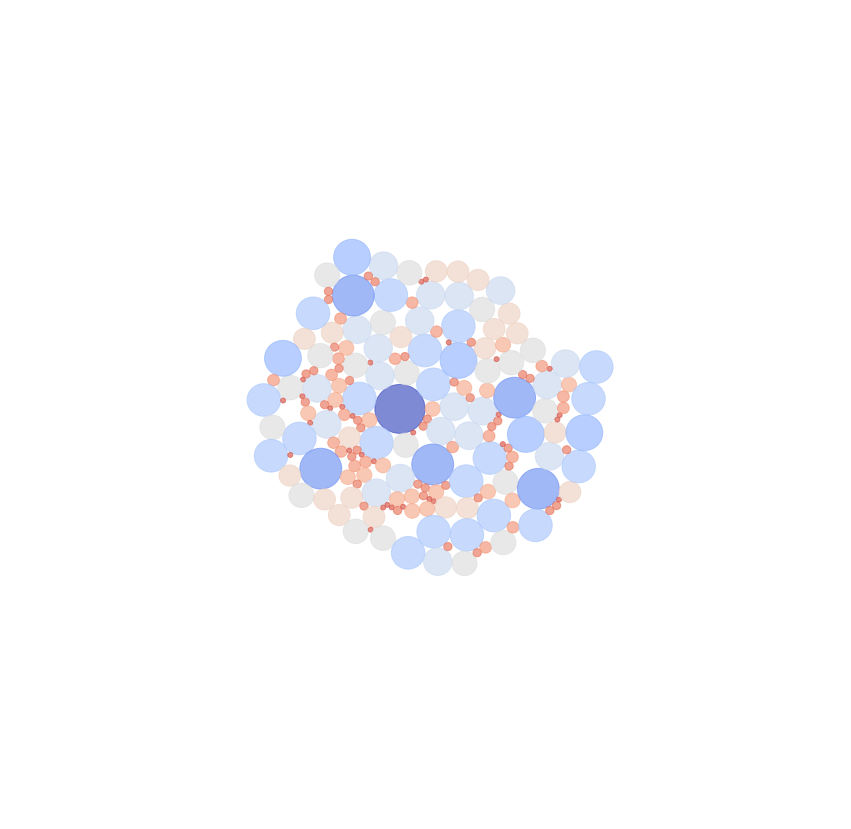

In [201]:
radii = radius
fig, ax = plt.subplots()
cmap = get_cmap('coolwarm_r')
circles = pc.pack(radii)
coor_x, coor_y, r = [], [], []
for (x,y,radius) in circles:
    coor_x.append(x)
    coor_y.append(y)
    r.append(radius)
#     print('x: {0}, y: {1}'.format(x, y))
    patch = plt.Circle(
        (x,y),
        radius,
        color=cmap(radius/max(radii)),
        alpha=0.65
    )
    ax.add_patch(patch)
fig.set_figheight(15)
fig.set_figwidth(15)
ax.set(xlim=(-500, 500), ylim=(-500, 500))
plt.axis('off')
plt.show();

In [202]:
df_year_circle = pd.DataFrame(data = [[np.nan] * 7], columns=data_2013_shuffled.columns)

In [203]:
num_each_year = 100

In [204]:
data_2013_shuffled_2 = pd.concat([df_year_circle, 
                                  data_2013_shuffled.iloc[:num_each_year, :]], axis=0).reset_index(drop=True)

In [205]:
data_2013_shuffled_2.shape

(101, 7)

In [207]:
data_2013_shuffled_2['x'] = list(map(lambda x: x + 470, coor_x[:num_each_year+1]))
data_2013_shuffled_2['y'] = list(map(lambda x: x + 240, coor_y[:num_each_year+1]))
data_2013_shuffled_2['rank'] = r[:num_each_year+1]
data_2013_shuffled_2.iloc[1:, :].to_csv('data_2013_shuffled.csv', index=False)

In [215]:
data_2013_shuffled_2.head()

,title,artist,listType,listHighestRank,Tickets Sold,rank_each_year,releaseYear,x,y,rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,439.236780,246.377920,30
1,The Way Way Back,Fox Searchlight,Comedy,16.883689,2644857.0,110.0,2013.0,478.236780,246.377920,9
2,All is Lost,Roadside Attractions,Thriller/Suspense,15.615107,743813.0,157.0,2013.0,471.929088,233.879399,5
3,20 Feet From Stardom,RADiUS-TWC,Documentary,15.388547,593021.0,169.0,2013.0,467.060328,225.144688,5
4,Safe Haven,Relativity,Drama,18.083796,8782179.0,47.0,2013.0,488.208203,219.081075,17
